# Take-Home Challenge: Ultimate Technologies Inc.
## Notebook by Debisree Ray
### Part 1: Exploratory Data Analysis:

The attached **logins.json file** contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.


Let's start by importing the libraries.

In [15]:
import os
import math 
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import json
from IPython.display import Image


#ignore warning messages to ensure clean outputs
import warnings
warnings.filterwarnings('ignore')

In [98]:
# Read the data
df = pd.read_json('logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [99]:
df.shape

(93142, 1)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [101]:
df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [102]:
df.columns

Index(['login_time'], dtype='object')

* So, the data contains 93142 rows and only one column.
* The column is the timestamp of the user login information.
* There is no missing value.
* The data is from 1970-01-01 to 1970-04-13

In [103]:
#Resample in 15 minute time interval:

df.set_index('login_time', inplace=True)
df['count'] = 1
df = df.resample('15T').sum()
df.head(10)

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
1970-01-01 21:15:00,4
1970-01-01 21:30:00,0
1970-01-01 21:45:00,4
1970-01-01 22:00:00,9


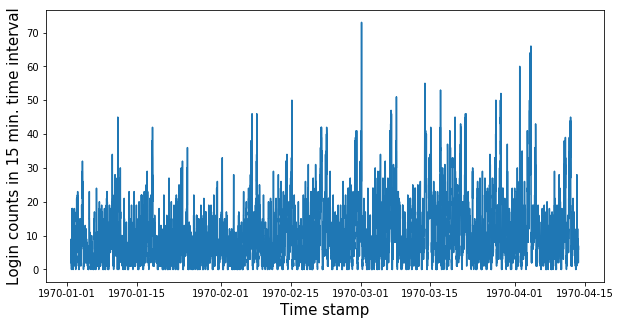

In [104]:
# Visually:
plt.figure(figsize=(10,5))
_=plt.plot(df)
plt.xlabel('Time stamp',fontsize=15)
plt.ylabel('Login counts in 15 min. time interval', fontsize=15)
plt.savefig('1.png')
plt.show()

So, above is the visual interpretation of the time-series login data. We see here that we have some series overplotting, but that there are clear areas where there are trends. This is characterized by a darker line on the plot. What we can do now is split the data by month and see if we can more easily find trends.

In [105]:
import datetime
df.reset_index(drop=False, inplace=True)
df['month']= pd.to_datetime(df['login_time'],errors= 'coerce').dt.month

In [110]:
df.columns

Index(['login_time', 'count', 'month'], dtype='object')

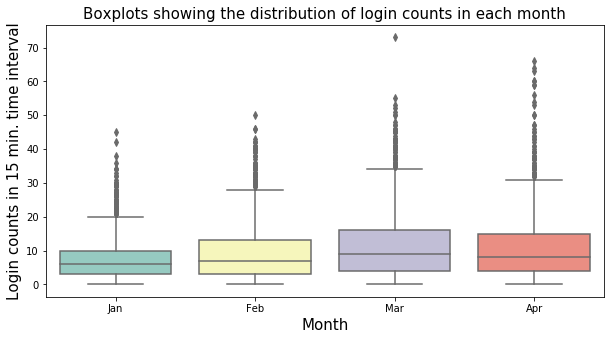

In [155]:
#Boxplots showing counts of each month:

plt.figure(figsize=(10,5))
_ = sns.boxplot(df['month'],df['count'], palette="Set3")
plt.xlabel('Month',fontsize=15)
plt.ylabel('Login counts in 15 min. time interval',fontsize=15)
plt.xticks([0,1,2,3], ['Jan','Feb','Mar','Apr'])
plt.title('Boxplots showing the distribution of login counts in each month', fontsize=15)
plt.show()

In [119]:
jan_df = df[df['month']==1]
feb_df = df[df['month']==2]
mar_df = df[df['month']==3]
apr_df = df[df['month']==4]

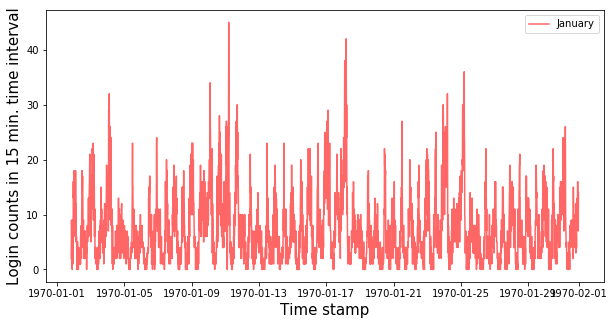

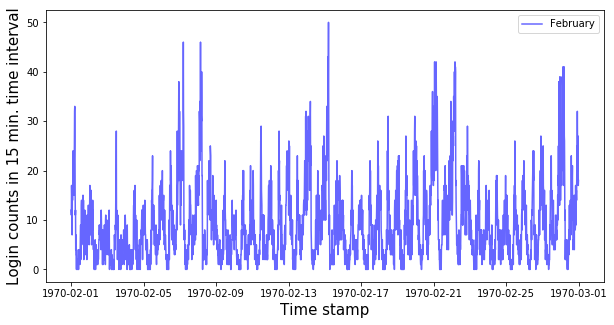

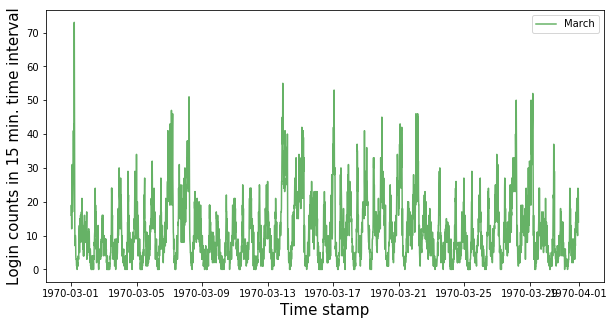

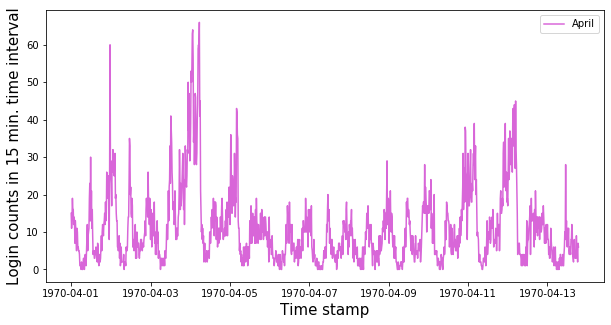

In [120]:
#Plot each month data separetely:

#January:
plt.figure(figsize=(10,5))
_=plt.plot(jan_df['login_time'],jan_df['count'],c='r',alpha=0.6,label='January')
plt.xlabel('Time stamp',fontsize=15)
plt.ylabel('Login counts in 15 min. time interval', fontsize=15)
plt.legend()
plt.savefig('2a.png')
plt.show()

#February:
plt.figure(figsize=(10,5))
_=plt.plot(feb_df['login_time'],feb_df['count'],c='b',alpha=0.6,label='February')
plt.xlabel('Time stamp',fontsize=15)
plt.ylabel('Login counts in 15 min. time interval', fontsize=15)
plt.legend()
plt.savefig('2b.png')
plt.show()

#March:
plt.figure(figsize=(10,5))
_=plt.plot(mar_df['login_time'],mar_df['count'],c='g',alpha=0.6,label='March')
plt.xlabel('Time stamp',fontsize=15)
plt.ylabel('Login counts in 15 min. time interval', fontsize=15)
plt.legend()
plt.savefig('2c.png')
plt.show()

#April:
plt.figure(figsize=(10,5))
_=plt.plot(apr_df['login_time'],apr_df['count'],c='m',alpha=0.6,label='April')
plt.xlabel('Time stamp',fontsize=15)
plt.ylabel('Login counts in 15 min. time interval', fontsize=15)
plt.legend()
plt.savefig('2d.png')
plt.show()

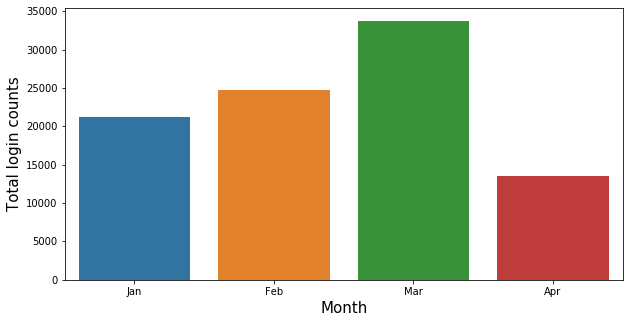

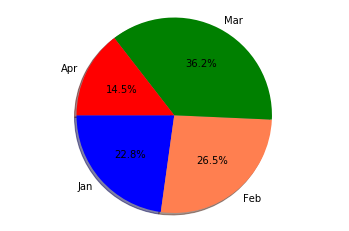

In [157]:
#Total login counts:

jc=jan_df['count'].sum()
fc = feb_df['count'].sum()
mc= mar_df['count'].sum()
ac=apr_df['count'].sum()

#Visually:
plt.figure(figsize=(10,5))
x=['Jan','Feb','Mar','Apr']
y=[jc,fc,mc,ac]
_=sns.barplot(x,y)
plt.xlabel('Month',fontsize=15)
plt.ylabel('Total login counts',fontsize=15)

plt.show()

#Pieplot:
labels = x
sizes = y
colors = ('b','coral','g','r')
explode = (0.00, 0,0,0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
#plt.savefig("5a.png")
plt.show()

* Here we can see the total login count distribution across different months.
* Maximum login counts (36.2%) is in the month of March.
* Minimum login counts (14.5%) is in the month of April. However, we have the data for April only upto 04/13.

In [144]:
jan_df['dayofweek']= pd.to_datetime(jan_df['login_time'],errors= 'coerce').dt.dayofweek
feb_df['dayofweek']= pd.to_datetime(feb_df['login_time'],errors= 'coerce').dt.dayofweek
mar_df['dayofweek']= pd.to_datetime(mar_df['login_time'],errors= 'coerce').dt.dayofweek
apr_df['dayofweek']= pd.to_datetime(apr_df['login_time'],errors= 'coerce').dt.dayofweek
jan_df.head()

,login_time,count,month,dayofweek
0,1970-01-01 20:00:00,2,1,3
1,1970-01-01 20:15:00,6,1,3
2,1970-01-01 20:30:00,9,1,3
3,1970-01-01 20:45:00,7,1,3
4,1970-01-01 21:00:00,1,1,3


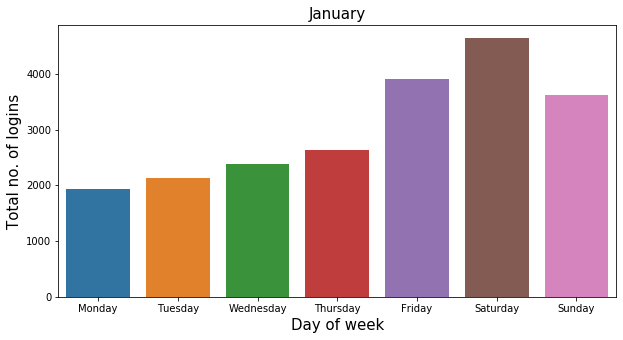

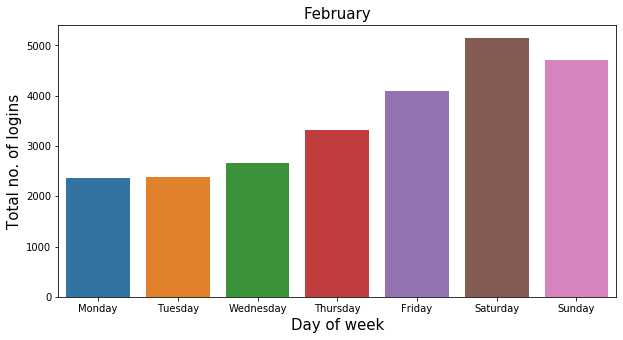

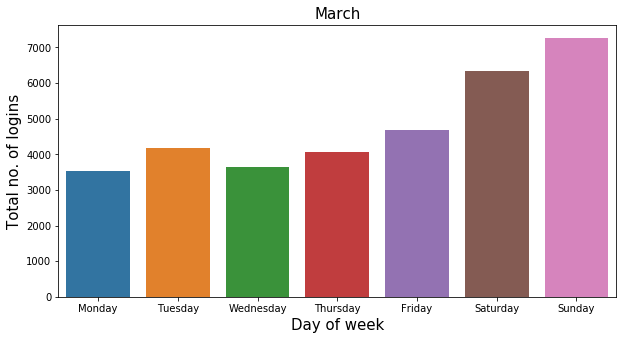

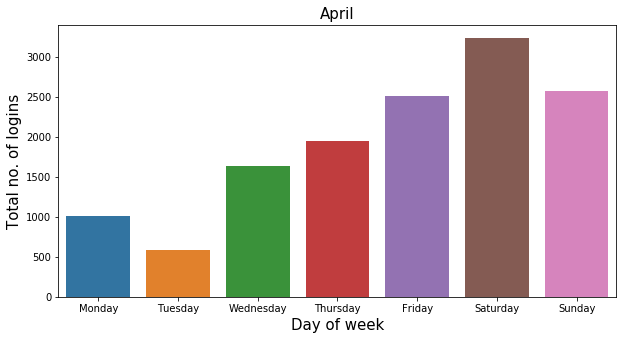

In [164]:
jan_day_count=jan_df.groupby('dayofweek')['count'].sum()
feb_day_count=feb_df.groupby('dayofweek')['count'].sum()
mar_day_count=mar_df.groupby('dayofweek')['count'].sum()
apr_day_count=apr_df.groupby('dayofweek')['count'].sum()

#Visually: 
#plt.subplot(221)
plt.figure(figsize=(10,5))
_=sns.barplot(jan_day_count.index,jan_day_count.values)
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xlabel('Day of week',fontsize=15)
plt.ylabel('Total no. of logins',fontsize=15)
plt.title('January',fontsize=15)
plt.show()


#plt.subplot(222)
plt.figure(figsize=(10,5))
_=sns.barplot(feb_day_count.index,feb_day_count.values)
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xlabel('Day of week',fontsize=15)
plt.ylabel('Total no. of logins',fontsize=15)
plt.title('February',fontsize=15)
plt.show()

#plt.subplot(223)
plt.figure(figsize=(10,5))
_=sns.barplot(mar_day_count.index,mar_day_count.values)
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xlabel('Day of week',fontsize=15)
plt.ylabel('Total no. of logins',fontsize=15)
plt.title('March',fontsize=15)
plt.show()

#plt.subplot(224)
plt.figure(figsize=(10,5))
_=sns.barplot(apr_day_count.index,apr_day_count.values)
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xlabel('Day of week',fontsize=15)
plt.ylabel('Total no. of logins',fontsize=15)
plt.title('April',fontsize=15)
plt.show()

* So above plotted the distribution of total no. of logins over different days of week for different months.
* The common trend for each month is very prominent- The login counts are maximum in the weekends.
* So the weekly pattern is very evident, that the login counts start on Monday and gradually increases in the weekend. The trend is very similar in January and February. And somewhat similar in March and April. However, we don't have the full data from the month of April. 

In [186]:
#Time of the login:

jan_df['time']= pd.to_datetime(jan_df['login_time'],errors= 'coerce').dt.time
feb_df['time']= pd.to_datetime(feb_df['login_time'],errors= 'coerce').dt.time
mar_df['time']= pd.to_datetime(mar_df['login_time'],errors= 'coerce').dt.time
apr_df['time']= pd.to_datetime(apr_df['login_time'],errors= 'coerce').dt.time


jan_time_count=jan_df.groupby('time')['count'].sum()
feb_time_count=feb_df.groupby('time')['count'].sum()
mar_time_count=mar_df.groupby('time')['count'].sum()
apr_time_count=apr_df.groupby('time')['count'].sum()
#jan_time_count

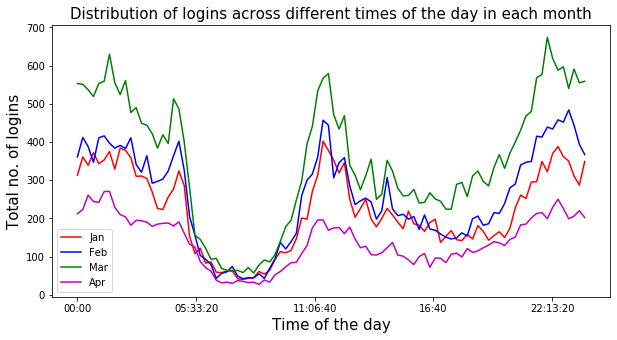

In [188]:
plt.figure(figsize=(10,5))
_=plt.plot(jan_time_count.index,jan_time_count.values, color='r',label='Jan')
_=plt.plot(feb_time_count.index,feb_time_count.values, color='b',label='Feb')
_=plt.plot(mar_time_count.index,mar_time_count.values, color='g',label='Mar')
_=plt.plot(apr_time_count.index,apr_time_count.values, color='m',label='Apr')
plt.xlabel('Time of the day',fontsize=15)
plt.ylabel('Total no. of logins',fontsize=15)
plt.title ('Distribution of logins across different times of the day in each month', fontsize =15)
plt.legend()
plt.show()

* Plotted the daily login pattern for each month.
* Surprisingly the pattern is similar for all the months.
* The login starts in midnight and gradually decreases as time passes. It reaches minima in the morning. Then again sharply rises around 11 am. Again gradually decreases towards the afternoon time. Next again gradually increases in the evening and reaches to the peak in the night time.

### Part 2: Experiment and metrics design:

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
how you will implement the experiment.
what statistical test(s) you will conduct to verify the significance of the observation.
how you would interpret the results and provide recommendations to the city operations team along with any caveats.

### Solution:


* Th metric for success is the **profit**, but other metrics are as follows:
  * The percentage of time a driver spends in either city.
  * Volume of traffic, which may indicate the indirect profit
  * Less wait times
  
The choice of the metrics can be many, but it depends on what exactly the city needs.

* One experiment is to conduct an **A/B Test**. The 'control group' would be the users, not using the toll bridge. And the 'test group' is the users using the toll bridge. We need to keep track of the revenue gained from both sides and compare it against each other within a given period of time. A statistical test that we can use is applying a t-test, with a p-value of (0.5).

In the end, it'll be hard to evaluate the performance of this experiment within a short period of time. This experiment will have to be monitored for a while and adjustments will have to be made yearly or periodically at the least.

### Part 3: Predictive modeling:

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

### Data description:

* **city:** city this user signed up in
* **phone:** primary device for this user
* **signup_date:** date of account registration; in the form ‘YYYY MM DD’
* **last_trip_date:** the last time this user completed a trip; in the form ‘YYYY MM DD’
* **avg_dist:** the average distance in miles per trip taken in the first 30 days after signup
* **avg_rating_by_driver:** the rider’s average rating over all of their trips
* **avg_rating_of_driver:** the rider’s average rating of their drivers over all of their trips
* **surge_pct:** the percent of trips taken with surge multiplier > 1
* **avg_surge:** The average surge multiplier over all of this user’s trips
* **trips_in_first_30_days:** the number of trips this user took in the first 30 days after signing up
* **ultimate_black_user:** TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
* **weekday_pct:** the percent of the user’s trips occurring during a weekday

### 3.1 Reading the data:

In [439]:
#Reading the data:

import json

file = open('ultimate_data_challenge.json', 'r')
df_new = pd.DataFrame(json.load(file))
file.close()

df_new.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [194]:
df_new.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

In [196]:
df_new.shape

(50000, 12)

In [198]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [209]:
print(df_new['avg_rating_of_driver'].isnull().sum())
print(df_new['phone'].isnull().sum())
print(df_new['avg_rating_by_driver'].isnull().sum())

8122
396
201


* The data has 50000 rows and 12 columns (features).
* 'avg_rating_of_driver' has 8122 missing values.
* 'phone' has 396 missing values.
* 'avg_rating_by_driver' has 201 missing value.

In [201]:
df_new.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [199]:
# convert them to proper datetime format
df_new['last_trip_date'] = pd.to_datetime(df_new['last_trip_date'])
df_new['signup_date'] = pd.to_datetime(df_new['signup_date'])

### 3.2 Exploratory Data Analysis:
### 3.2.1 City:

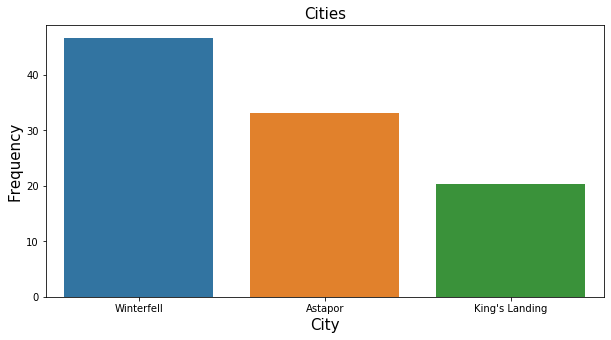

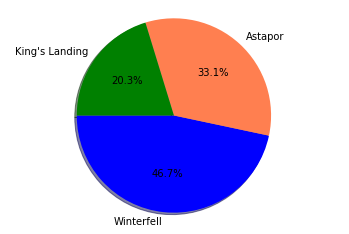

In [212]:
#City:

city=df_new['city'].value_counts(normalize=True)

plt.figure(figsize=(10,5))
_=sns.barplot(city.index, city.values*100)
plt.xlabel('City',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Cities',fontsize=15)
plt.show()

#Pieplot:

labels = city.index
sizes = city.values
colors = ('b','coral','g')
explode = (0.00, 0,0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
#plt.savefig("5a.png")
plt.show()



* So, there are three cities from where the users registered.
* Maximum (46.7%) users are from the city of **Winterfell**.
* 33.1% of the users are from the city of **Astapor**.
* Least (20.3%) no. of users are from the city of **King's Landing**.

### 3.2.2 trips_in_first_30_days:


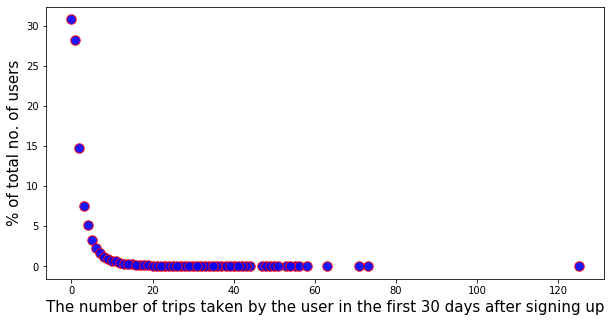

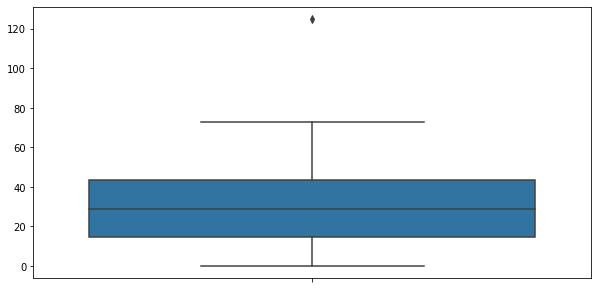

2.2782

In [250]:
trip = df_new['trips_in_first_30_days'].value_counts(normalize= True)


#Visually:
plt.figure(figsize=(10,5))
_=plt.scatter(trip.index, trip.values*100, color='b',alpha=0.9, edgecolor='r', s=90)
plt.xlabel('The number of trips taken by the user in the first 30 days after signing up',fontsize=15)
plt.ylabel('% of total no. of users',fontsize=15)
plt.show()

#Boxplot:
plt.figure(figsize=(10,5))
_=sns.boxplot(trip.index,orient='v')
plt.show()

df_new['trips_in_first_30_days'].mean()

* We see that more than 30% (15390) of the users took 'zero' trips in the first 30 days after signing up.
* Only 1 user took the maximum no. (125) of trips in the first 30 days.
* This is a numerical feature describing the number of trips taken by the user in the first 30 days after signing up.
* The boxplot shows the distribution of the data.
* The average no. of trips taken by the users in the first 30 days after signing up = 2.28

### 3.2.3 signup_date:


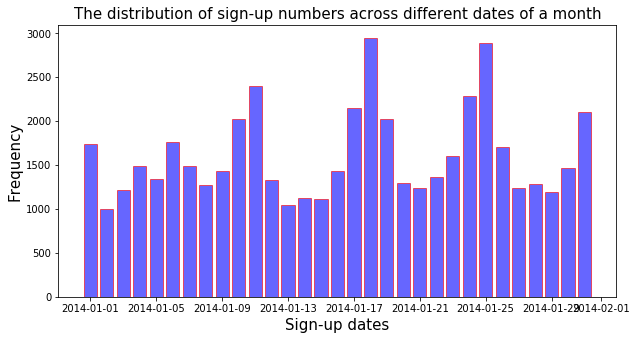

In [278]:
date=df_new['signup_date'].value_counts()


#Visually:
plt.figure(figsize=(10,5))
_=plt.bar(date.index,date.values,color='b',alpha=0.6,edgecolor='r')
plt.xlabel('Sign-up dates', fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('The distribution of sign-up numbers across different dates of a month', fontsize=15)
plt.show()

#date

* The sign-up dates are from 2014-01-01 to 2014-01-31.
* The maximum sign-ups (2948) are on 2014-01-18 
* The minimum sign-ups (1004) are on 2014-01-02

### 3.2.4 avg_rating_of_driver:

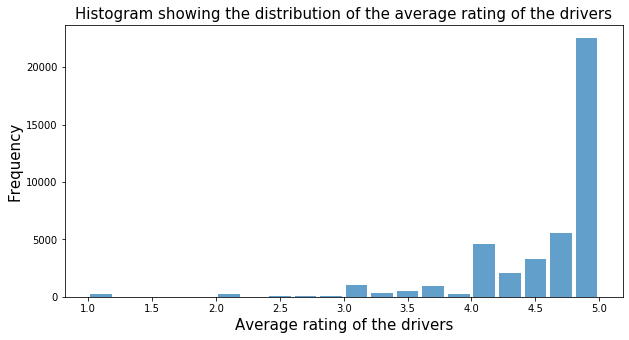

In [304]:
rate=df_new['avg_rating_of_driver'].value_counts()


#Visually:
plt.figure(figsize=(10,5))
plt.hist(df_new['avg_rating_of_driver'], bins=20,alpha=0.7, rwidth=0.85)
plt.xlabel('Average rating of the drivers',fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title ('Histogram showing the distribution of the average rating of the drivers',fontsize=15)
plt.show()



* This is a numerical feature showing the average rating of the drivers.
* 20771 drivers got 5 stars. Followed by the 4 stars (obtained by 4193 drivers).
* Minimum rating obtained is 1.6 (1 driver)

### 3.2.5 avg_surge:

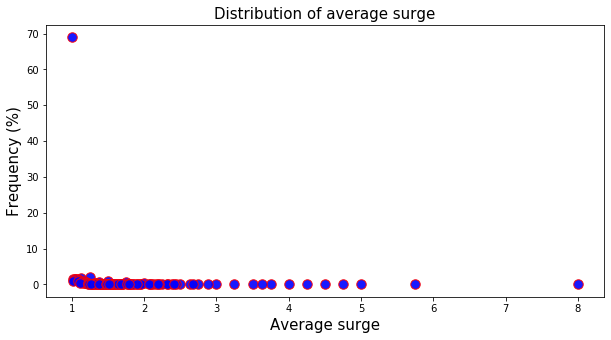

8.0

In [320]:
surge= df_new['avg_surge'].value_counts(normalize=True)

#Visually:
plt.figure(figsize=(10,5))
_=plt.scatter(surge.index, surge.values*100,color='b',alpha=0.9, edgecolor='r', s=90)
plt.xlabel('Average surge',fontsize=15)
plt.ylabel('Frequency (%)',fontsize=15)
plt.title('Distribution of average surge', fontsize=15)
plt.show()

surge.index.max()


* Minimum average surge is 1.00  (34454 times), which is 70% of the times.
* Maximum average surge listed is 8.00 

### 3.2.6 last_trip_date:

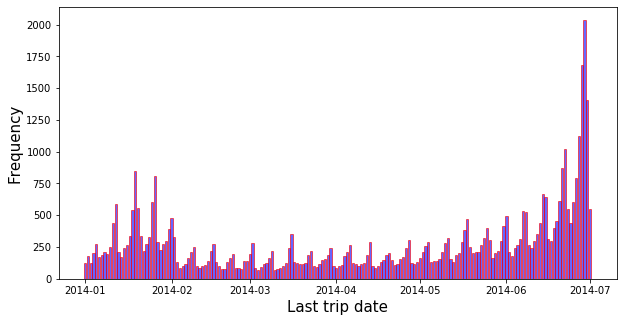

In [327]:
last=df_new['last_trip_date'].value_counts()

#Visually:
plt.figure(figsize=(10,5))
_=plt.bar(last.index,last.values,color='b',alpha=0.6,edgecolor='r')
plt.xlabel('Last trip date', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

* the last time this user completed a trip.
* 2036 times 2014-06-29 was listed.

### 3.2.7 phone:

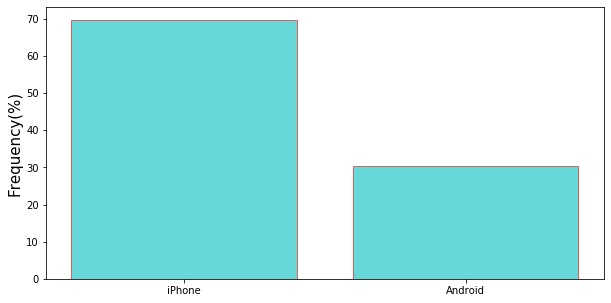

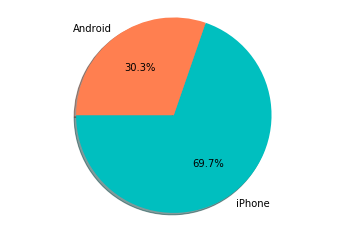

In [344]:
ph=df_new['phone'].value_counts(normalize=True)

#Visually:
plt.figure(figsize=(10,5))
_=plt.bar(ph.index,ph.values*100,color='c',alpha=0.6,edgecolor='r')
plt.ylabel('Frequency(%)',fontsize=15)
plt.show()

#Pieplot:
labels = ph.index
sizes = ph.values
colors = ('c','coral')
explode = (0.00, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels,colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
#plt.savefig("5a.png")
plt.show()

* This is the primary mobile device (Apple/ androde device) listed with any user.
* 69.7% of the users use iphone.
* 30.3% of the users use the android device.

### 3.2.8 surge_pct:

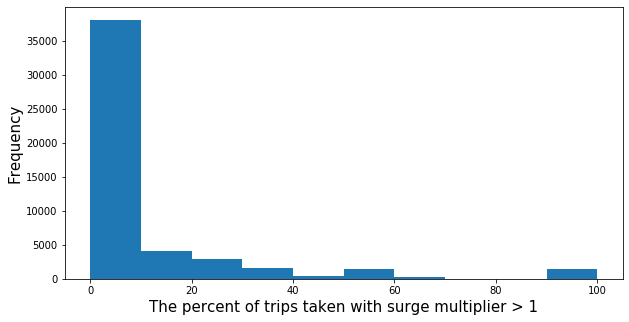

0.0      34409
100.0     1416
50.0      1367
33.3      1152
25.0       906
         ...  
34.6         1
35.2         1
45.8         1
52.9         1
63.6         1
Name: surge_pct, Length: 367, dtype: int64

In [350]:
pct=df_new['surge_pct'].value_counts()


plt.figure(figsize=(10,5))
_=plt.hist(df_new['surge_pct'])
plt.xlabel('The percent of trips taken with surge multiplier > 1',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.show()

pct

* This is a numerical variable describing the percent of trips taken with surge multiplier > 1
* There are 34409 users taken 0% trips with surge multiplier > 1

### 3.2.9 ultimate_black_user:


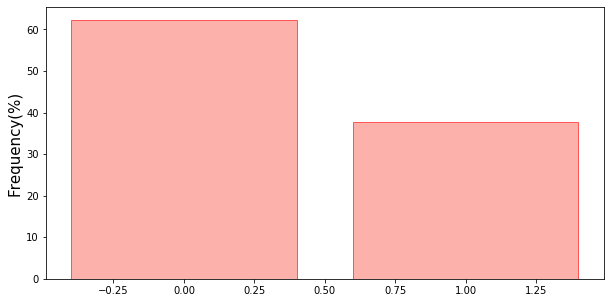

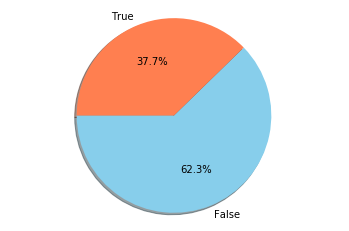

In [354]:
bl=df_new['ultimate_black_user'].value_counts(normalize=True)

#Visual interpretation:

plt.figure(figsize=(10,5))
_=plt.bar(bl.index,bl.values*100,color='salmon',alpha=0.6,edgecolor='r')
plt.ylabel('Frequency(%)',fontsize=15)
plt.show()

#Pieplot:
labels = bl.index
sizes = bl.values
colors = ('skyblue','coral')
explode = (0.00, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels,colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
#plt.savefig("5a.png")
plt.show()

* This is a categorical variable: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise.
* 62.3% of times it is 'False'.
* 37.7% of times it is 'True'.

### 3.2.10 weekday_pct:

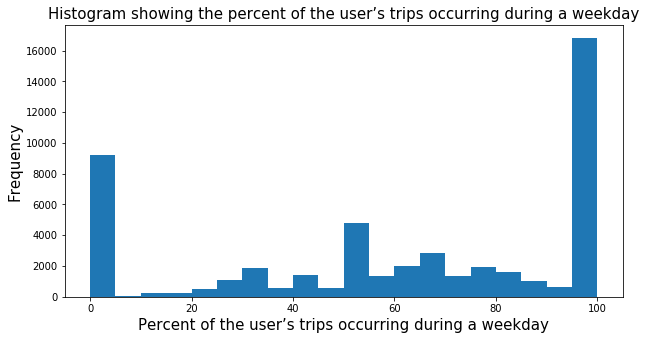

In [368]:
wday=df_new['weekday_pct'].value_counts()


#Histogram:
plt.figure(figsize=(10,5))
_=plt.hist(df_new['weekday_pct'],bins=20)
plt.xlabel('Percent of the user’s trips occurring during a weekday',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title ('Histogram showing the percent of the user’s trips occurring during a weekday', fontsize=15)
plt.show()



* This is a numerical featre which shows that the percent of the user’s trips occurring during a weekday.
* 16659 users have 100% of their trips on weekdays.

### 3.2.11 avg_dist:

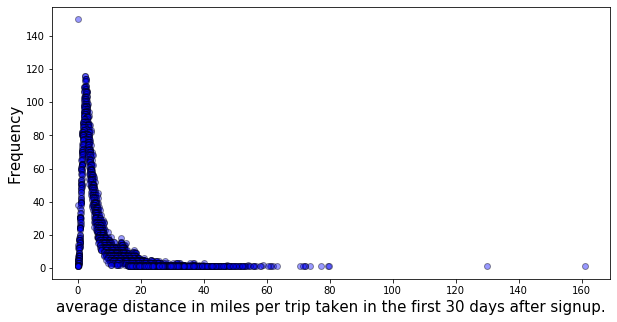

In [379]:
dis= df_new['avg_dist'].value_counts()


#Visually:
plt.figure(figsize=(10,5))
_=plt.scatter(dis.index,dis.values,c='b',alpha=0.4 , edgecolor='k')
plt.xlabel('average distance in miles per trip taken in the first 30 days after signup.', fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.show()

* This is a numerical feature showing the average distance in miles per trip taken in the first 30 days after signup.
* Maximum miles per trip listed = 160.96
* Minimum miles listed = 0 (no trip basically) 15o times.

### 3.2.12 avg_rating_by_driver:

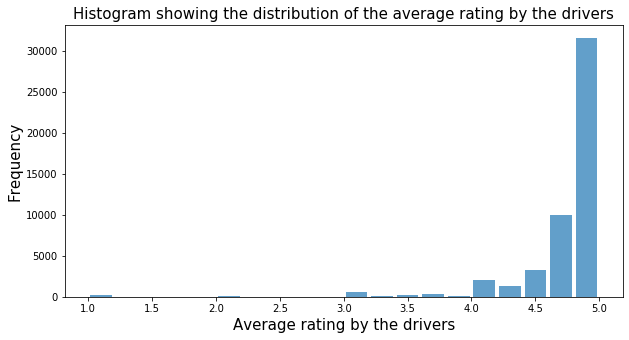

In [388]:
driver_rating=df_new['avg_rating_by_driver'].value_counts()

#visually:
plt.figure(figsize=(10,5))
_=plt.hist(df_new['avg_rating_by_driver'],bins=20,alpha=0.7, rwidth=0.85)
plt.xlabel('Average rating by the drivers',fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title ('Histogram showing the distribution of the average rating by the drivers',fontsize=15)
plt.show()

In [392]:
driver_rating

5.0    28508
4.8     4537
4.7     3330
4.9     3094
4.5     2424
4.6     2078
4.0     1914
4.3     1018
4.4      860
3.0      602
4.2      342
3.5      199
3.7      195
1.0      181
2.0      126
4.1      125
3.8      111
3.3       47
3.9       41
2.5       31
3.6       19
3.4        5
1.5        4
2.8        3
3.2        2
2.7        2
2.3        1
Name: avg_rating_by_driver, dtype: int64

* This is another numerical feature showing the average rating by the drivers.
* 28508 times, it was given the 5 stars.
* The lowest rating is 1, which is given 181 times.
* 2.3 rating has just given once.


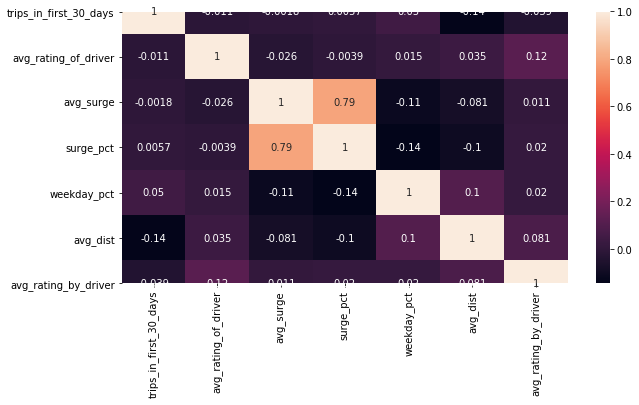

In [408]:
# correlation matrix : correlation among the numerical features



numerical = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct'
            ,'avg_dist', 'avg_rating_by_driver']
#Heatmap:
plt.figure(figsize=(10,5))
corr = df_new[numerical].corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,annot=True)
plt.show()

In [440]:
df_new[numerical].corr()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
trips_in_first_30_days,1.000000,-0.011302,-0.001841,0.005720,0.050388,-0.136329,-0.039115
avg_rating_of_driver,-0.011302,1.000000,-0.026189,-0.003899,0.014630,0.034509,0.123175
avg_surge,-0.001841,-0.026189,1.000000,0.793582,-0.110071,-0.081491,0.010597
surge_pct,0.005720,-0.003899,0.793582,1.000000,-0.144918,-0.104414,0.020103
weekday_pct,0.050388,0.014630,-0.110071,-0.144918,1.000000,0.101652,0.020442
avg_dist,-0.136329,0.034509,-0.081491,-0.104414,0.101652,1.000000,0.080540
avg_rating_by_driver,-0.039115,0.123175,0.010597,0.020103,0.020442,0.080540,1.000000


So, we see that 'surge_pct' and the 'avg_surge' are two highly correlated features.

### 3.3 Part 3 ‐ Predictive modeling:

* Let us create a target variable called '**Retained**'. And drop the feature **'last_trip_date'**.

In [441]:
# Create the target variable called 'retained':

df_new['retained'] = np.nan
df_new.loc[df_new['last_trip_date'] >= '2014-06-01', 'retained'] = 1
df_new.loc[df_new['last_trip_date'] < '2014-06-01', 'retained'] = 0

df_new.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1.0
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0.0


In [442]:
# As we have created the target feature based on the 'last_trip_date' feature, we need to drop 'last_trip_date'.

df_new.drop('last_trip_date', axis=1, inplace=True)
df_new.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,1.0
1,Astapor,0,2014-01-29,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,0.0
2,Astapor,3,2014-01-06,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,0.0
3,King's Landing,9,2014-01-10,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,1.0
4,Winterfell,14,2014-01-27,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,0.0


In [443]:
# Drop signup_date:

df_new.drop('signup_date', axis=1, inplace=True)

#Dummy variables:
df_encoded = pd.get_dummies(df_new, columns = ['city','phone', 'ultimate_black_user'])

df_encoded.head()

#Rename King's Lnding by KL:
df_encoded.rename(columns={"city_King's Landing": 'city_KL'}, inplace=True)

In [444]:
df_encoded.columns

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver',
       'retained', 'city_Astapor', 'city_KL', 'city_Winterfell',
       'phone_Android', 'phone_iPhone', 'ultimate_black_user_False',
       'ultimate_black_user_True'],
      dtype='object')

In [445]:
features_cols = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver', 'city_Astapor', 'city_KL', 'city_Winterfell',
       'phone_Android', 'phone_iPhone', 'ultimate_black_user_False',
       'ultimate_black_user_True']

features = df_encoded[features_cols]
#cat_df = X_df['package_id','from_area_id','to_area_id']
#features = cont_df.join(pd.get_dummies(cat_df))
y = df_new['retained']

#features
X= features

In [450]:
#Replace NaN/null values:
features.isnull().sum()

features.avg_rating_of_driver.fillna(0, inplace=True)
features.avg_rating_by_driver.fillna(0, inplace=True)

In [452]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.metrics import confusion_matrix

# Splitting the dataset into training and test set:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#Apply RF to the training data:

rf = RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='entropy')
rf.fit(X_train, y_train)

#Predict using the model:

y_predict_rf = rf.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_rf)
print(cnf_matrix)
Accuracy_rf=rf.score(X_test,y_test)
print(Accuracy_rf)

[[7562 1817]
 [1910 3711]]
0.7515333333333334


In [453]:
cv_scores_test= cross_val_score(rf,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(rf,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_rf))

[0.80600521 0.82043527 0.80927681 0.81266599 0.81549727]
Mean cross validation test score: 0.8127761092689407
Mean cross validation train score: 0.824827564561826
Standard deviation in cv scores: 0.004983367300650331


                     Features  Importance scores
0      trips_in_first_30_days           0.010750
1        avg_rating_of_driver           0.013491
2                   avg_surge           0.013704
3                   surge_pct           0.014875
4                 weekday_pct           0.016636
5                    avg_dist           0.018750
6        avg_rating_by_driver           0.040081
7                city_Astapor           0.060357
8                     city_KL           0.071882
9             city_Winterfell           0.085969
10              phone_Android           0.086126
11               phone_iPhone           0.108013
12  ultimate_black_user_False           0.135042
13   ultimate_black_user_True           0.324325


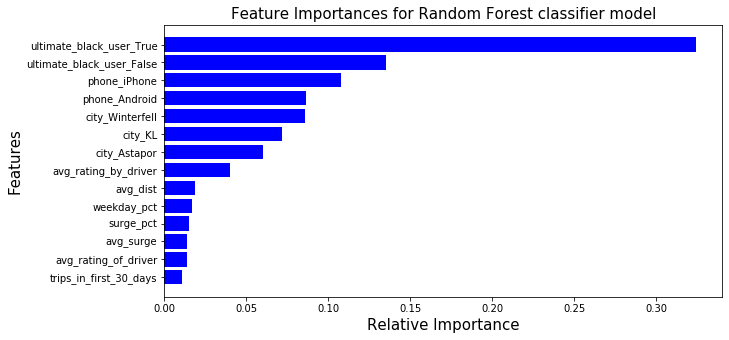

In [456]:
#Feature importance:

features = X
importances = list(rf.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(X,imp)),columns =['Features', 'Importance scores']) 
print(tab)

#Visual comparison:
plt.figure(figsize=(10,5))
index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
_=plt.barh(index,imp, align='center',color='b')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Feature Importances for Random Forest classifier model',fontsize=15)
plt.show()


### Discussion:

So, basically the objective was to build a predictive model which would classify a user as 'retained' or not. We have used Random Forest classifier and have built a model. The model is about 75% accurate and does a fairly good job of determining the difference between a retained and not retained user as shown by the confusion matrix. 
